In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [8]:
import requests
requests.__version__

'2.22.0'

In [9]:
# Import the requests library.
import requests

In [10]:
# Import the API key.
from config import weather_api_key

In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1944833cd9c2ff8fc5f3b999d7a4105e


In [12]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [14]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

In [15]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | sitka
Processing Record 2 of Set 13 | guhagar
Processing Record 3 of Set 13 | illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 13 | bethel
Processing Record 5 of Set 13 | jamestown
Processing Record 6 of Set 13 | yuncheng
Processing Record 7 of Set 13 | platteville
Processing Record 8 of Set 13 | puerto ayora
Processing Record 9 of Set 13 | bluff
Processing Record 10 of Set 13 | cairns
Processing Record 11 of Set 13 | vao
Processing Record 12 of Set 13 | albany
Processing Record 13 of Set 13 | jamame
Processing Record 14 of Set 13 | udachnyy
Processing Record 15 of Set 13 | belushya guba
City not found. Skipping...
Processing Record 16 of Set 13 | vaini
Processing Record 17 of Set 13 | mount gambier
Processing Record 18 of Set 13 | katsuura
Processing Record 19 of Set 13 | victoria
Processing Record 20 of Set 13 | banda aceh
Processing Record 21 of Set 13 | iqaluit
Processing Record 22 of Set 13 | vila velha
Processing Record 23 of

Processing Record 33 of Set 16 | kurtamysh
Processing Record 34 of Set 16 | kahului
Processing Record 35 of Set 16 | saldanha
Processing Record 36 of Set 16 | paamiut
Processing Record 37 of Set 16 | kupang
Processing Record 38 of Set 16 | strelka
Processing Record 39 of Set 16 | belmonte
Processing Record 40 of Set 16 | umea
Processing Record 41 of Set 16 | barbar
City not found. Skipping...
Processing Record 42 of Set 16 | arcata
Processing Record 43 of Set 16 | billings
Processing Record 44 of Set 16 | waingapu
Processing Record 45 of Set 16 | torbay
Processing Record 46 of Set 16 | samalaeulu
City not found. Skipping...
Processing Record 47 of Set 16 | poya
Processing Record 48 of Set 16 | kempsey
Processing Record 49 of Set 16 | harper
Processing Record 50 of Set 16 | ranau
Processing Record 1 of Set 17 | rocha
Processing Record 2 of Set 17 | westport
Processing Record 3 of Set 17 | novikovo
Processing Record 4 of Set 17 | roald
Processing Record 5 of Set 17 | anloga
Processing Re

Processing Record 19 of Set 20 | kapoeta
City not found. Skipping...
Processing Record 20 of Set 20 | idil
Processing Record 21 of Set 20 | terrace
Processing Record 22 of Set 20 | campbell river
Processing Record 23 of Set 20 | along
Processing Record 24 of Set 20 | lagoa
Processing Record 25 of Set 20 | sangar
Processing Record 26 of Set 20 | necochea
Processing Record 27 of Set 20 | bengkulu
City not found. Skipping...
Processing Record 28 of Set 20 | manassas
Processing Record 29 of Set 20 | vestmannaeyjar
Processing Record 30 of Set 20 | panacan
Processing Record 31 of Set 20 | mulege
Processing Record 32 of Set 20 | airai
Processing Record 33 of Set 20 | oxford
Processing Record 34 of Set 20 | gigmoto
Processing Record 35 of Set 20 | champerico
Processing Record 36 of Set 20 | taunggyi
Processing Record 37 of Set 20 | kuala krai
City not found. Skipping...
Processing Record 38 of Set 20 | mobile
Processing Record 39 of Set 20 | garden city
Processing Record 40 of Set 20 | pangody

Processing Record 4 of Set 24 | agutaya
Processing Record 5 of Set 24 | ibotirama
Processing Record 6 of Set 24 | quepos
Processing Record 7 of Set 24 | mookane
Processing Record 8 of Set 24 | burica
City not found. Skipping...
Processing Record 9 of Set 24 | mundo nuevo
Processing Record 10 of Set 24 | suez
Processing Record 11 of Set 24 | moyale
Processing Record 12 of Set 24 | riyadh
Processing Record 13 of Set 24 | shimoda
Processing Record 14 of Set 24 | mecca
Processing Record 15 of Set 24 | ostersund
Processing Record 16 of Set 24 | eureka
Processing Record 17 of Set 24 | show low
Processing Record 18 of Set 24 | vila franca do campo
Processing Record 19 of Set 24 | felidhoo
City not found. Skipping...
Processing Record 20 of Set 24 | kismayo
City not found. Skipping...
Processing Record 21 of Set 24 | miranorte
City not found. Skipping...
Processing Record 22 of Set 24 | badajoz
Processing Record 23 of Set 24 | ciudad dario
Processing Record 24 of Set 24 | mirador
Processing Re

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sitka,37.17,-99.65,37.00,50,0,6.64,US,2020-01-06 03:02:37
1,Guhagar,17.48,73.19,76.66,66,0,12.80,IN,2020-01-06 03:02:38
2,Bethel,60.79,-161.76,-16.60,68,1,6.93,US,2020-01-06 02:59:04
3,Jamestown,-33.21,138.60,73.40,55,82,0.31,AU,2020-01-06 02:58:49
4,Yuncheng,35.03,111.00,34.75,98,100,5.95,CN,2020-01-06 03:02:38
5,Platteville,42.73,-90.48,33.80,79,1,13.87,US,2020-01-06 03:02:39
6,Puerto Ayora,-0.74,-90.35,75.99,82,0,3.00,EC,2020-01-06 03:02:31
7,Bluff,-23.58,149.07,90.79,38,74,13.69,AU,2020-01-06 03:01:08
8,Cairns,-16.92,145.77,91.00,66,40,8.05,AU,2020-01-06 03:02:39
9,Vao,59.10,26.19,30.83,95,100,14.32,EE,2020-01-06 02:56:48


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [19]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1578279892.799432

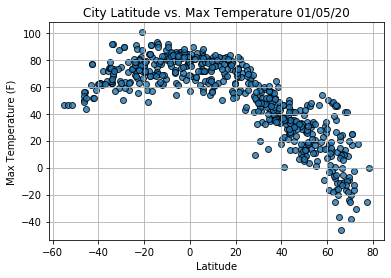

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

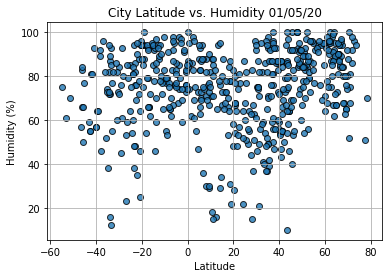

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

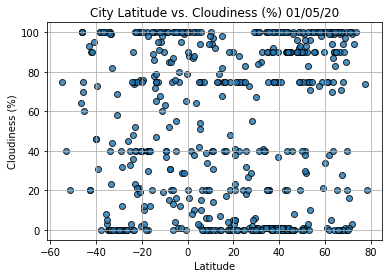

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

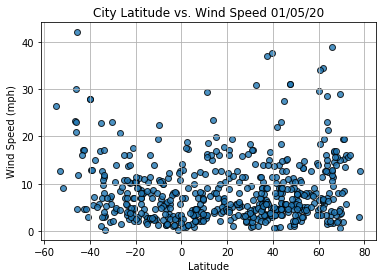

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [24]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [25]:
index13 = city_data_df.loc[13]
index13

City                        Vaini
Lat                         15.34
Lng                         74.49
Max Temp                       68
Humidity                       88
Cloudiness                     75
Wind Speed                    4.7
Country                        IN
Date          2020-01-06 02:58:58
Name: 13, dtype: object

In [26]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4       True
       ...  
556     True
557     True
558     True
559     True
560     True
Name: Lat, Length: 561, dtype: bool

In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n
                        for Maximum Temperature', 'Max Temp',(10,40))

SyntaxError: EOL while scanning string literal (<ipython-input-28-f235f13efcbc>, line 6)

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for Maximum Temperature', 'Max Temp',(-50,90))

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n
                        for % Humidity', '% Humidity',(40,10))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for % Humidity', '% Humidity',(-50,15))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n
                        for Wind Speed', 'Wind Speed',(40,35))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for Wind Speed', 'Wind Speed',(-50,35))